# Desafio Indicium - EDA

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

In [139]:
dados = pd.read_csv('teste_indicium_precificacao.csv')

In [140]:
dados.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Exploring the Data - Part 1 - Overview

### Sobre os tipos de dados

Temos dados de tipos variados:

* _strings_: nome, host_name, bairro_group, bairro, room_type, ultima_review (Date)
* _float_: latitude e longitude (GeoData), reviews_por_mes
* _int_: id, host_id, price, minimo_noites, numero_de_reviews, calculado_host_listings_count, disponibilidade_365

In [141]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

### Sobre os dados faltantes

* Existem alguns poucos dados faltantes em `nome` e `host_name`, 16 e 21 respectivamente, o que não é muito visto que corresponde a 0.0003% e 0.0004% dos dados (podendo inclusive haver intersecções).
* Muitos dados faltantes para `ultima_review` e `reviews_por_mes`, inclusive a mesma quantidade 10.052, podendo inclusive serem os mesmos dados.


In [142]:
dados.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

## Exploring the Data - Part 2 - Statistics

### Sobre as Colunas

Primeiramente, vamos explorar cada coluna separadamente, analisando e criando gráficos das medidas estatísticas (quando for aplicável).


Da coluna `id`, todas as entradas são únicas, essa coluna será utilizada como identificador para os dados. 

In [143]:
dados['id'].nunique()

48894

Da coluna `nome`, alguns nomes de anúncios se repetem, o que pode indicar algum padrão no tipo de imóvel que está sendo anunciado.

In [144]:
dados['nome'].value_counts()

nome
Hillside Hotel                                       18
Home away from home                                  17
New york Multi-unit building                         16
Brooklyn Apartment                                   12
Loft Suite @ The Box House Hotel                     11
                                                     ..
Charming one bedroom - newly renovated rowhouse       1
Affordable room in Bushwick/East Williamsburg         1
Sunny Studio at Historical Neighborhood               1
43rd St. Time Square-cozy single bed                  1
Trendy duplex in the very heart of Hell's Kitchen     1
Name: count, Length: 47904, dtype: int64

Da coluna `host_id`, temos algumas repetições, o que nos faz pensar que existe um relacionamento 1-N entre `id` e `host_id`

In [145]:
dados['host_id'].value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
177932088      1
274273284      1
214535893      1
8636072        1
1273444        1
Name: count, Length: 37457, dtype: int64

Da coluna `host_name`, podemos observar que a contagem não coincide com `host_id`, ou seja, existem usuários com mesmo nome e ids diferentes.

In [146]:
dados['host_name'].value_counts()

host_name
Michael          417
David            403
Sonder (NYC)     327
John             293
Alex             279
                ... 
Elmar              1
Pujan              1
Raheem             1
Rusaa              1
Erin At Bedly      1
Name: count, Length: 11452, dtype: int64

Da coluna `bairro_group`, observa-se que há poucos valores, e que a maior parte é "Manhattan" e "Brooklyn".

<Axes: xlabel='bairro_group'>

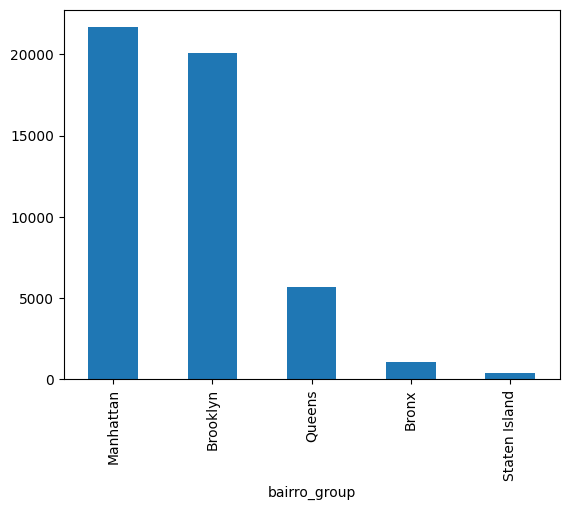

In [147]:
dados['bairro_group'].value_counts().plot(kind='bar')

Da coluna `bairro`, observa-se que há muitos valores, e que existe uma discrepância na distribuição dos valores.

In [148]:
dados['bairro'].value_counts()

bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

Para as colunas `latitude` e `longitude`, observase um intervalo de valores bastante restrito, correspondente ao entorno da cidade de Nova Iorque.

In [149]:
dados['latitude'].min(), dados['latitude'].max()

(np.float64(40.49979), np.float64(40.91306))

In [150]:
dados['longitude'].min(), dados['longitude'].max()

(np.float64(-74.24442), np.float64(-73.71299))

Para a coluna `roon_type`, é possível ver que são apenas 3 categorias, e que uma delas tem muito menos dados do que as outras.

<Axes: xlabel='room_type'>

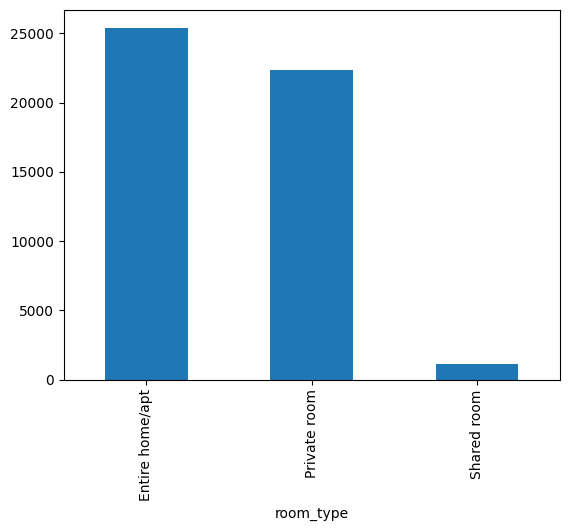

In [151]:
dados['room_type'].value_counts().plot(kind='bar')

Para a coluna `price`, é possível observar que os valores variam muito, entretanto existe uma concentração maior de dados abaixo de 2000, e a existência de muitos outliers.

Média: 152.7207632838385
Mediana: 106.0
Desvio Padrão: 240.1566250608003
Variância: 57675.204560593826
Minimo: 0
Maximo: 10000
Moda: 0    100
Name: price, dtype: int64


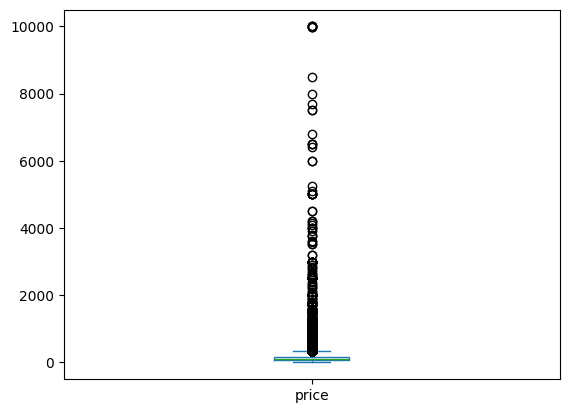

In [152]:
dados['price'].plot(kind='box')

print(f'Média: {dados['price'].mean()}')
print(f'Mediana: {dados['price'].median()}')
print(f'Desvio Padrão: {dados['price'].std()}')
print(f'Variância: {dados['price'].var()}')
print(f'Minimo: {dados['price'].min()}')
print(f'Maximo: {dados['price'].max()}')
print(f'Moda: {dados['price'].mode()}')

Para a coluna `minimo_noites`, assim como `price` os valores variam muito, entretanto existe uma concentração maior de dados abaixo de 2000, e a existência de muitos outliers.

Média: 7.030085491062298
Mediana: 3.0
Desvio Padrão: 20.510741152203597
Variância: 420.69050261269814
Minimo: 1
Maximo: 1250
Moda: 0    1
Name: minimo_noites, dtype: int64


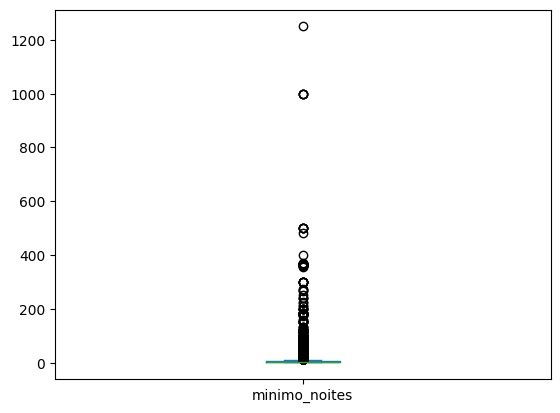

In [153]:
dados['minimo_noites'].plot(kind='box')

print(f'Média: {dados['minimo_noites'].mean()}')
print(f'Mediana: {dados['minimo_noites'].median()}')
print(f'Desvio Padrão: {dados['minimo_noites'].std()}')
print(f'Variância: {dados['minimo_noites'].var()}')
print(f'Minimo: {dados['minimo_noites'].min()}')
print(f'Maximo: {dados['minimo_noites'].max()}')
print(f'Moda: {dados['minimo_noites'].mode()}')

Para a coluna `numero_de_reviews`, observa-se uma distribuição de dados muito concentrada abaixo de 100, além da existência de muitos outliers.

Média: 23.27475763897411
Mediana: 5.0
Desvio Padrão: 44.55099108409524
Variância: 1984.7908065751335
Minimo: 0
Maximo: 629
Moda: 0    0
Name: numero_de_reviews, dtype: int64


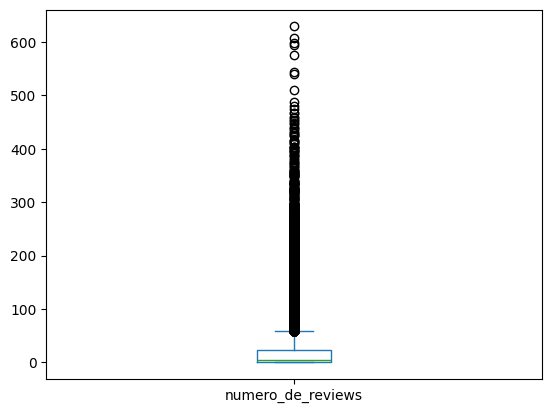

In [154]:
dados['numero_de_reviews'].plot(kind='box')

print(f'Média: {dados['numero_de_reviews'].mean()}')
print(f'Mediana: {dados['numero_de_reviews'].median()}')
print(f'Desvio Padrão: {dados['numero_de_reviews'].std()}')
print(f'Variância: {dados['numero_de_reviews'].var()}')
print(f'Minimo: {dados['numero_de_reviews'].min()}')
print(f'Maximo: {dados['numero_de_reviews'].max()}')
print(f'Moda: {dados['numero_de_reviews'].mode()}')

Para a coluna `ultima_review`, foi necessário convertê-la para o tipo Date, e é possível observar um intervalo de tempo considerável (8 anos) entre a última avaliação de um anúncio e outro.

In [155]:
dados['ultima_review'] = pd.to_datetime(dados['ultima_review'])

In [156]:
dados['ultima_review'].min(), dados['ultima_review'].max()

(Timestamp('2011-03-28 00:00:00'), Timestamp('2019-07-08 00:00:00'))

Para a coluna `reviews_por_mes`, observa-se uma concentração maior de dados abaixo de 10, e a presença de muitos valores discrepantes.

Média: 1.3732513773750066
Mediana: 0.72
Desvio Padrão: 1.6804532620154509
Variância: 2.82392316581837
Minimo: 0.01
Maximo: 58.5
Moda: 0    0.02
Name: reviews_por_mes, dtype: float64


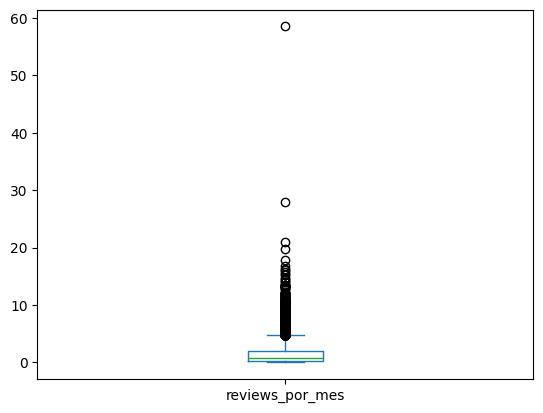

In [157]:
dados['reviews_por_mes'].plot(kind='box')

print(f'Média: {dados['reviews_por_mes'].mean()}')
print(f'Mediana: {dados['reviews_por_mes'].median()}')
print(f'Desvio Padrão: {dados['reviews_por_mes'].std()}')
print(f'Variância: {dados['reviews_por_mes'].var()}')
print(f'Minimo: {dados['reviews_por_mes'].min()}')
print(f'Maximo: {dados['reviews_por_mes'].max()}')
print(f'Moda: {dados['reviews_por_mes'].mode()}')

Para a coluna `calculado_host_listings_count`, observa-se uma concentração maior de dados abaixo de 50, e a presença de muitos valores discrepantes.

Média: 7.144005399435514
Mediana: 1.0
Desvio Padrão: 32.95285542761508
Variância: 1085.8906808333006
Minimo: 1
Maximo: 327
Moda: 0    1
Name: calculado_host_listings_count, dtype: int64


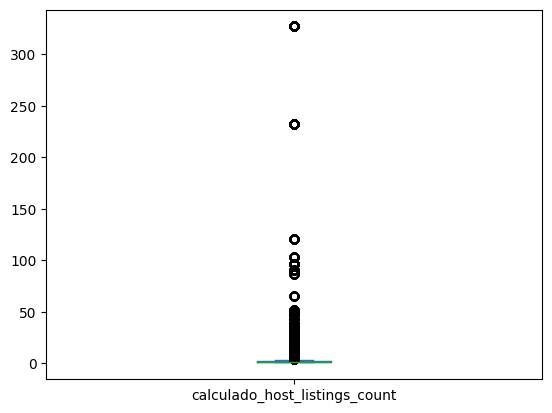

In [158]:
dados['calculado_host_listings_count'].plot(kind='box')

print(f'Média: {dados['calculado_host_listings_count'].mean()}')
print(f'Mediana: {dados['calculado_host_listings_count'].median()}')
print(f'Desvio Padrão: {dados['calculado_host_listings_count'].std()}')
print(f'Variância: {dados['calculado_host_listings_count'].var()}')
print(f'Minimo: {dados['calculado_host_listings_count'].min()}')
print(f'Maximo: {dados['calculado_host_listings_count'].max()}')
print(f'Moda: {dados['calculado_host_listings_count'].mode()}')

Para a coluna `disponibilidade_365`, observa-se uma distribuição bastante homogênea, embora mais concentrada entre 0 e 250.

Média: 112.77616885507425
Mediana: 45.0
Desvio Padrão: 131.61869220629893
Variância: 17323.480138096453
Minimo: 0
Maximo: 365
Moda: 0    0
Name: disponibilidade_365, dtype: int64


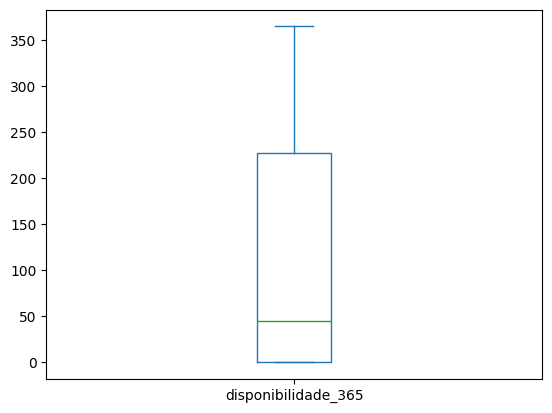

In [159]:
dados['disponibilidade_365'].plot(kind='box')

print(f'Média: {dados['disponibilidade_365'].mean()}')
print(f'Mediana: {dados['disponibilidade_365'].median()}')
print(f'Desvio Padrão: {dados['disponibilidade_365'].std()}')
print(f'Variância: {dados['disponibilidade_365'].var()}')
print(f'Minimo: {dados['disponibilidade_365'].min()}')
print(f'Maximo: {dados['disponibilidade_365'].max()}')
print(f'Moda: {dados['disponibilidade_365'].mode()}')

## Exploring the Data - Part 3 - Statistics

Nesta seção, exploraremos as relações entre variáveis (colunas), criando visualizações que nos ajudem a obter informações importantes sobre os dados. Primeiramente, vamos tentar entender as relações entre a variável alvo (`price`) e as demais variáveis, depois partiremos para as demais relações.

Text(0.5, 1.0, 'Price variation of bairro_group without outliers')

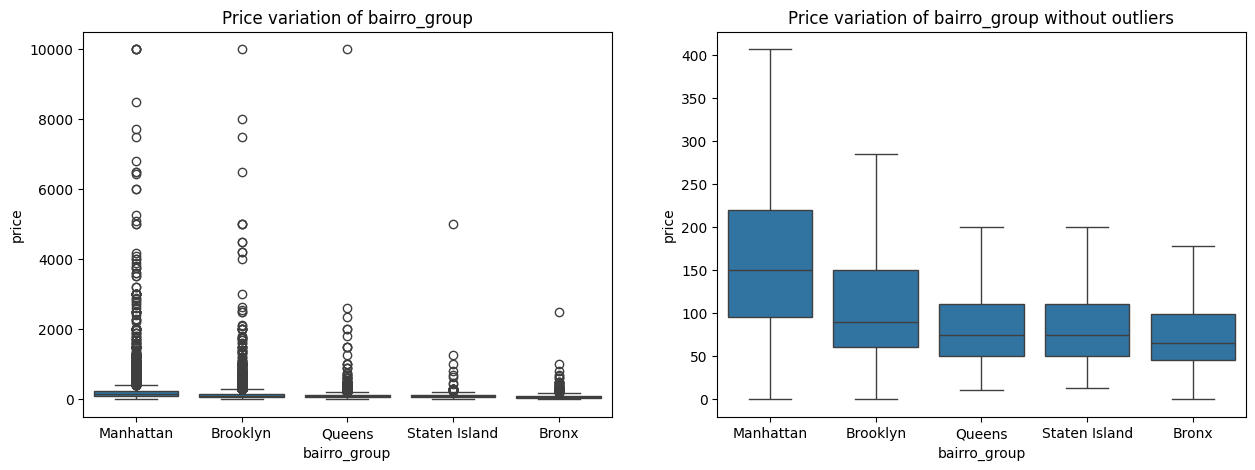

In [160]:
var = 'bairro_group'

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=dados, x=var, y='price', ax=axes[0])
sns.boxplot(data=dados, x=var, y='price', showfliers=False, ax=axes[1])

axes[0].set_title(f'Price variation of {var}')
axes[1].set_title(f'Price variation of {var} without outliers')

Text(0.5, 1.0, 'Price variation of room_type without outliers')

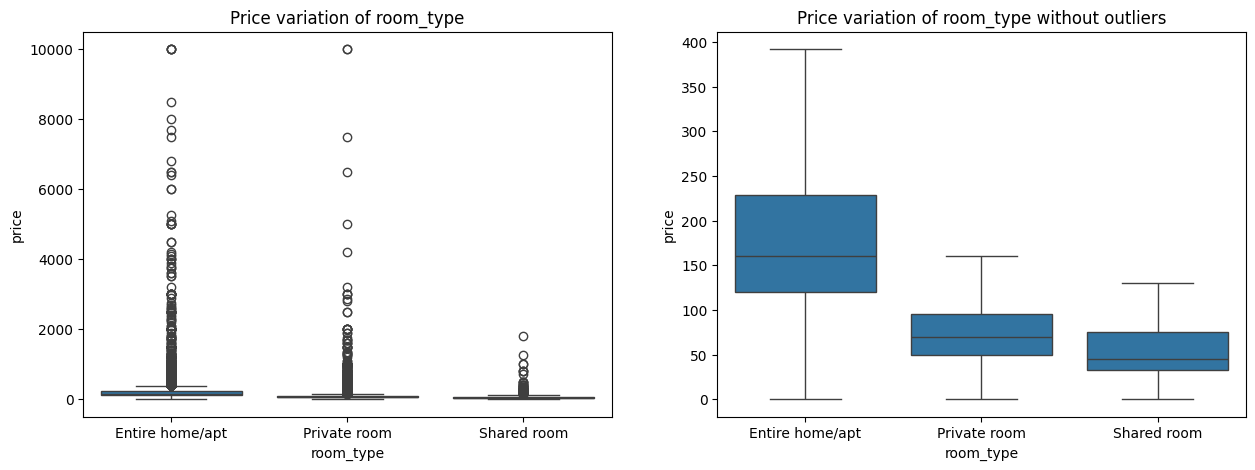

In [161]:
var = 'room_type'

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=dados, x=var, y='price', ax=axes[0])
sns.boxplot(data=dados, x=var, y='price', showfliers=False, ax=axes[1])

axes[0].set_title(f'Price variation of {var}')
axes[1].set_title(f'Price variation of {var} without outliers')

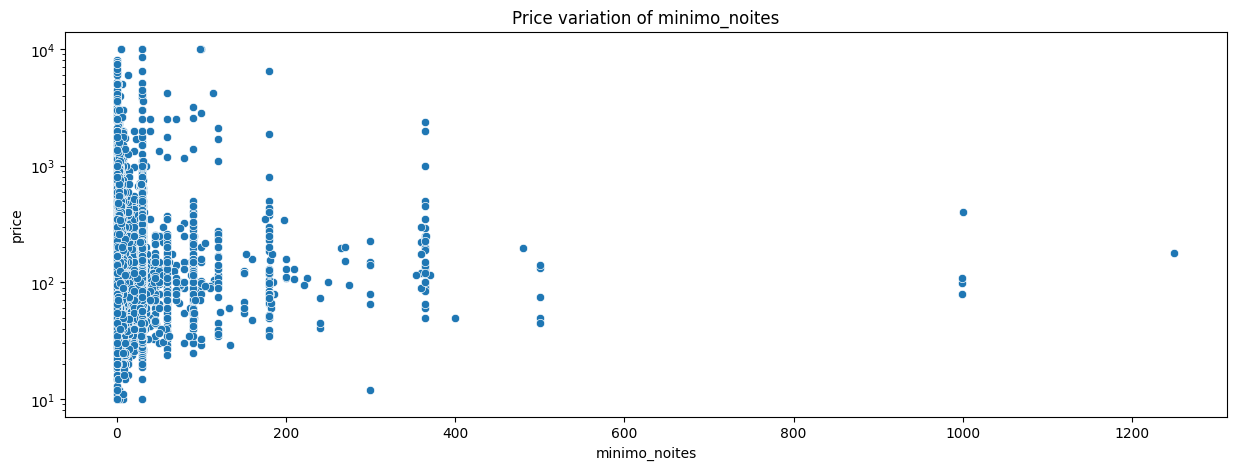

In [162]:
var = 'minimo_noites'

fig, axes = plt.subplots(figsize=(15, 5))

sns.scatterplot(data=dados, x=var, y='price', ax=axes)

axes.set_title(f'Price variation of {var}')
axes.set_yscale('log')

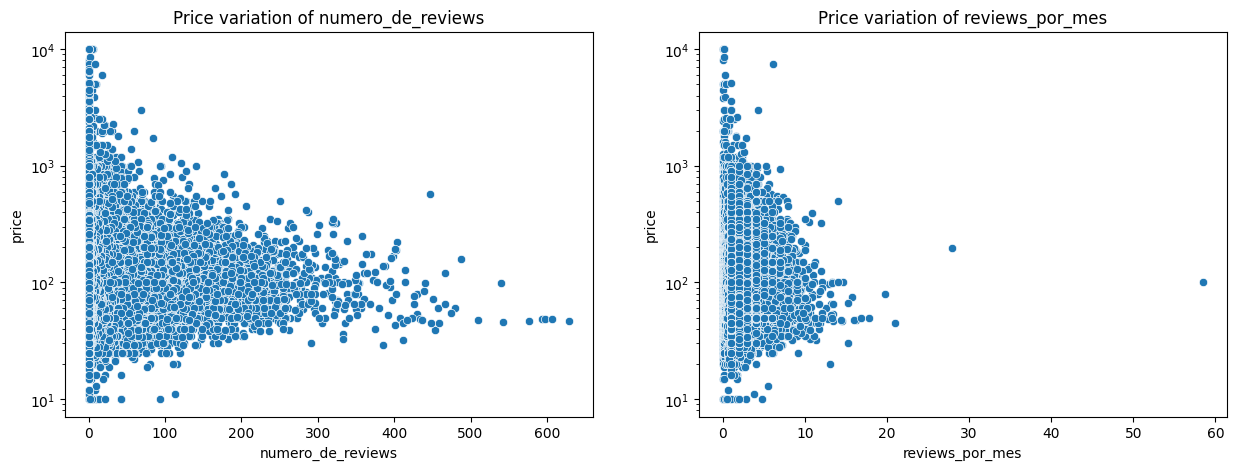

In [163]:
var = 'numero_de_reviews'
var_2 = 'reviews_por_mes'

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=dados, x=var, y='price', ax=axes[0])
sns.scatterplot(data=dados, x=var_2, y='price', ax=axes[1])

axes[0].set_title(f'Price variation of {var}')
axes[0].set_yscale('log')

axes[1].set_title(f'Price variation of {var_2}')
axes[1].set_yscale('log')


Para a coluna `ultima_review` adotaremos uma abordagem diferente, vamos configurar uma Data denominada "Marco Zero", ela servirá para contar a quantidade de dias desde a última avaliação. Depois, faremos a contagem de dias e transformaremos a coluna de "Data da última avaliação" para "Quantidade de dias desde a última avaliação". 

Min date: 2019-07-08 00:00:00


Text(0.5, 1.0, 'Price variation of dias_ultima_review')

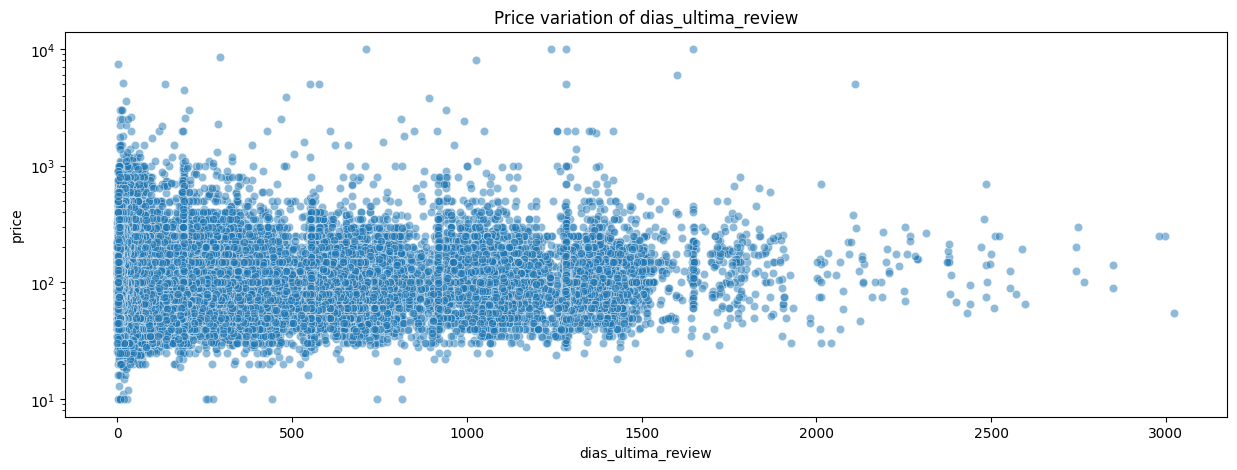

In [164]:

marco_zero = dados['ultima_review'].max()
print(f'Min date: {marco_zero}')

dados['dias_ultima_review'] = (marco_zero - dados['ultima_review']).dt.days

var = 'dias_ultima_review'

fig, axes = plt.subplots(figsize=(15, 5))

sns.scatterplot(data=dados, x=var, y='price', ax=axes, alpha=0.5)

axes.set_yscale('log')
axes.set_title(f'Price variation of {var}')

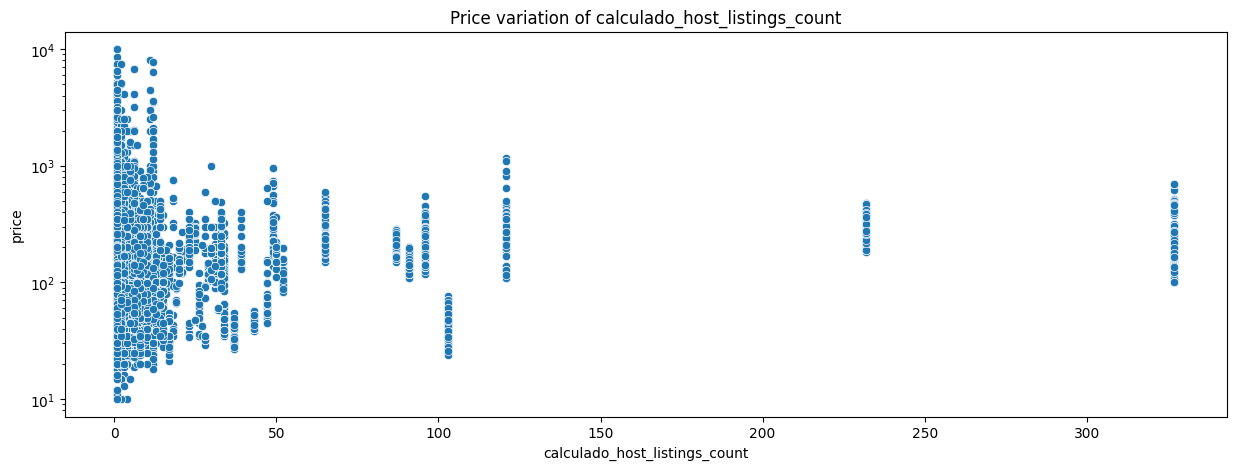

In [168]:
var = 'calculado_host_listings_count'

fig, axes = plt.subplots(figsize=(15, 5))

sns.scatterplot(data=dados, x=var, y='price', ax=axes)

axes.set_title(f'Price variation of {var}')
axes.set_yscale('log')

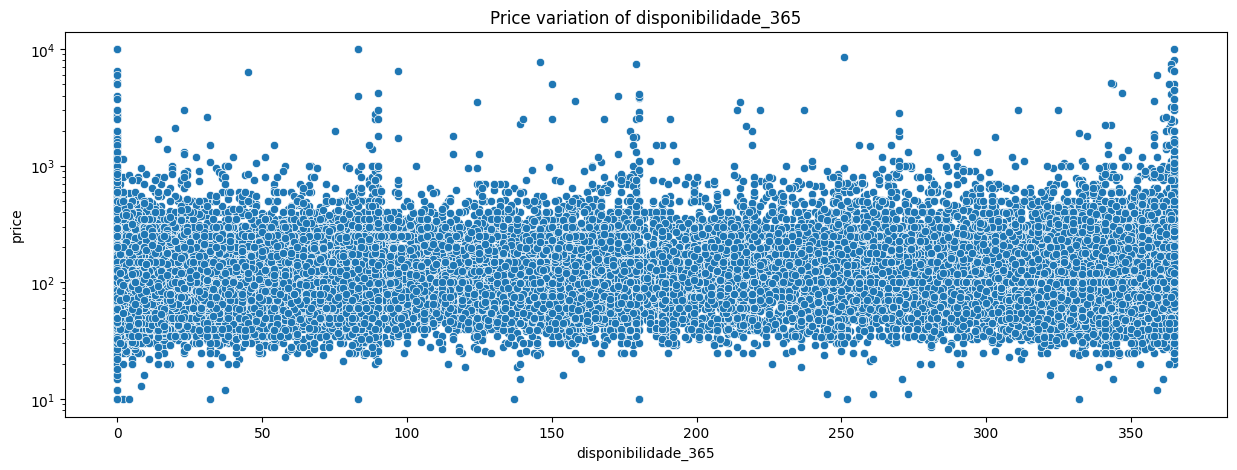

In [174]:
var = 'disponibilidade_365'

fig, axes = plt.subplots(figsize=(15, 5))

sns.scatterplot(data=dados, x=var, y='price', ax=axes)

axes.set_title(f'Price variation of {var}')
axes.set_yscale('log')

<Axes: xlabel='latitude', ylabel='longitude'>

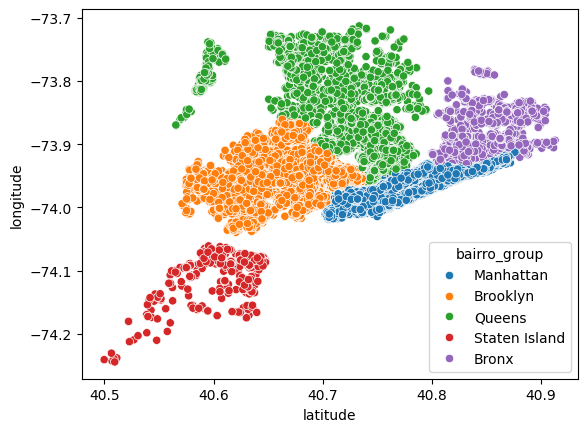

In [165]:
sns.scatterplot(data=dados, x='latitude', y='longitude', hue='bairro_group')